# Music Genre Classification

In [1]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf 
import tensorflow.keras as keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/music_genre.csv")

In [4]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [5]:
df.shape

(50005, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [7]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [8]:
df.shape

(50000, 18)

In [9]:
df.duplicated().value_counts()

False    50000
dtype: int64

## Data Analysis

In [10]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### Categorical Data

In [11]:
len(df['instance_id'].unique())

50000

In [12]:
df.drop("instance_id", axis = 1, inplace = True)

In [13]:
len(df['track_name'].unique())

41699

In [14]:
df['track_name'].value_counts()

Home               16
Forever            15
Without You        14
Summertime         13
Fire               13
                   ..
Build               1
In My Home          1
Fire Water Burn     1
Bitter End          1
Hip Hop Hooray      1
Name: track_name, Length: 41699, dtype: int64

In [15]:
df.drop("track_name", axis = 1, inplace = True)

In [16]:
len(df['artist_name'].unique())

6863

In [17]:
df['artist_name'].value_counts()

empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: artist_name, Length: 6863, dtype: int64

In [18]:
filtered_art = df[df["artist_name"] != 'empty_field']["artist_name"]
filtered_art

0                    Röyksopp
1        Thievery Corporation
2              Dillon Francis
3                    Dubloadz
4                 What So Not
                 ...         
50000                   BEXEY
50001               Roy Woods
50002                  Berner
50003               The-Dream
50004       Naughty By Nature
Name: artist_name, Length: 47511, dtype: object

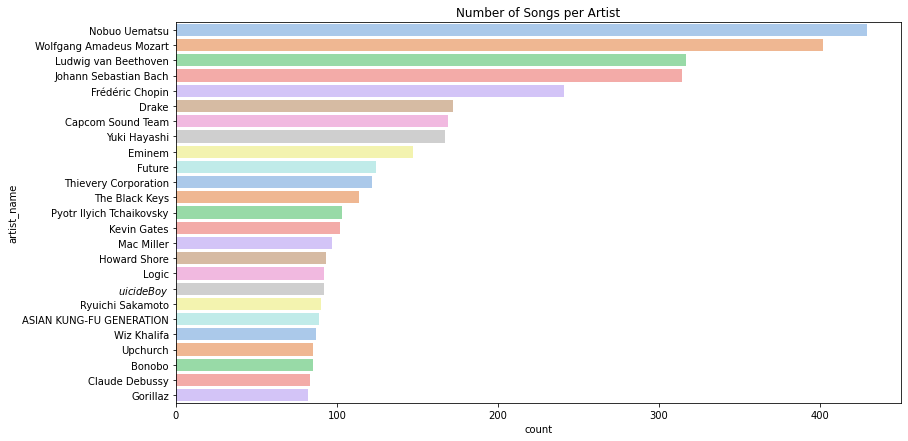

In [19]:
plt.figure(figsize=(13,7))
plt.title('Number of Songs per Artist')
sns.countplot(y = filtered_art, order=filtered_art.value_counts().index[:25], palette='pastel')
plt.show()

In [20]:
df.drop("artist_name", axis = 1, inplace = True)

In [21]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [22]:
df['key'].value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

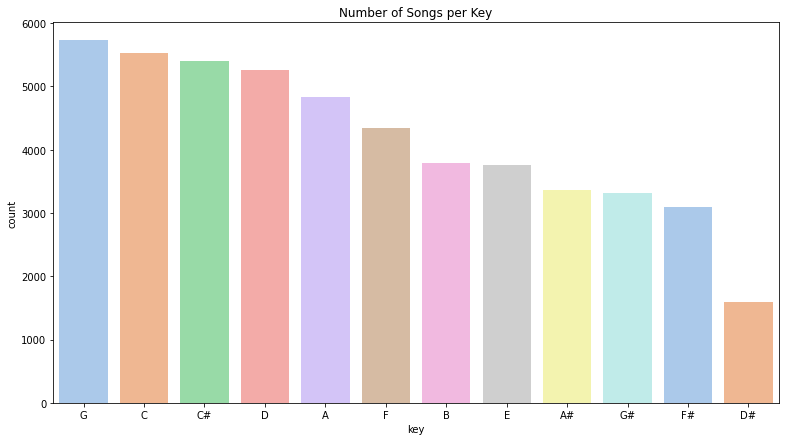

In [23]:
keys = df["key"]
plt.figure(figsize=(13,7))
plt.title('Number of Songs per Key')
sns.countplot(x = keys, order=keys.value_counts().index, palette='pastel')
plt.show()

In [24]:
df.groupby('music_genre')['key'].describe()

,count,unique,top,freq
music_genre,,,,
Alternative,5000,12,G,555
Anime,5000,12,C,594
Blues,5000,12,G,747
Classical,5000,12,C,602
Country,5000,12,G,707
Electronic,5000,12,C#,709
Hip-Hop,5000,12,C#,936
Jazz,5000,12,F,619
Rap,5000,12,C#,874


In [25]:
df['mode'].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

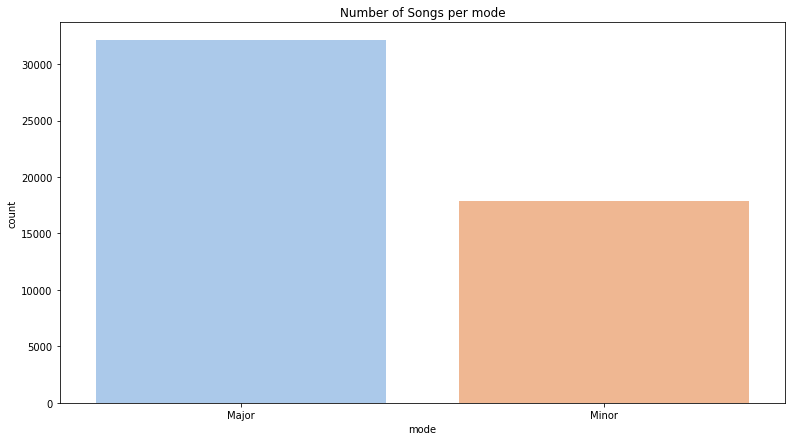

In [26]:
plt.figure(figsize=(13,7))
plt.title('Number of Songs per mode')
sns.countplot(x = df['mode'], order=df['mode'].value_counts().index, palette='pastel')
plt.show()

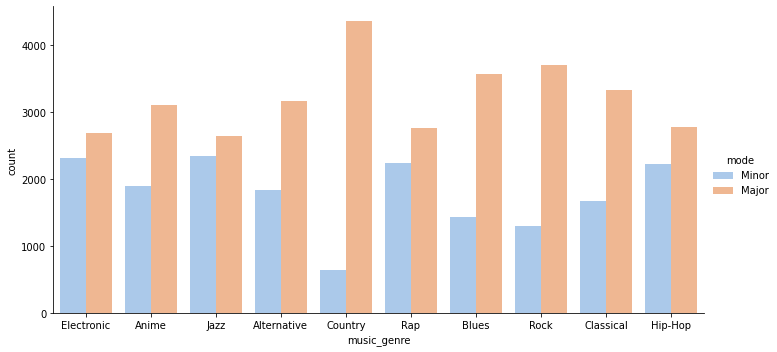

In [27]:
sns.catplot(data=df, x="music_genre", hue='mode', kind="count", aspect=2, palette = 'pastel')

In [28]:
df['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  object 
 12  obtained_date     50000 non-null  object 
 13  valence           50000 non-null  float64
 14  music_genre       50000 non-null  object 
dtypes: float64(10), object(5)
memory usage: 7.1+ MB


In [30]:
try:
  pd.to_numeric(df['tempo'])
except Exception as e:
  print(e)  

Unable to parse string "?" at position 5


In [31]:
df["tempo"].value_counts()

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: tempo, Length: 29394, dtype: int64

In [32]:
new_tempo = df[df['tempo'] != '?']
pd.to_numeric(new_tempo['tempo'])

0        100.889
1        115.002
2        127.994
3        128.014
4        145.036
          ...   
50000     98.028
50001    122.043
50002    131.079
50003     75.886
50004     99.201
Name: tempo, Length: 45020, dtype: float64

In [33]:
df = df[df['tempo'] != '?']
df['tempo'] = pd.to_numeric(df['tempo'])
df["tempo"] = np.around(df["tempo"], decimals = 2)
df.shape

<ipython-input-33-3d5166452045>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempo'] = pd.to_numeric(df['tempo'])
<ipython-input-33-3d5166452045>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tempo"] = np.around(df["tempo"], decimals = 2)


(45020, 15)

In [34]:
df.drop("obtained_date", axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45020 non-null  float64
 1   acousticness      45020 non-null  float64
 2   danceability      45020 non-null  float64
 3   duration_ms       45020 non-null  float64
 4   energy            45020 non-null  float64
 5   instrumentalness  45020 non-null  float64
 6   key               45020 non-null  object 
 7   liveness          45020 non-null  float64
 8   loudness          45020 non-null  float64
 9   mode              45020 non-null  object 
 10  speechiness       45020 non-null  float64
 11  tempo             45020 non-null  float64
 12  valence           45020 non-null  float64
 13  music_genre       45020 non-null  object 
dtypes: float64(11), object(3)
memory usage: 5.2+ MB


### Numerical Data

In [36]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952957,0.456394
std,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641700,0.247161
min,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.350000,0.000000
25%,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.940000,0.257000
50%,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.880000,0.448000
75%,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.472500,0.648000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.280000,0.992000


In [37]:
no_dur = df[df['duration_ms'] == -1]
no_dur.shape

(4460, 14)

In [38]:
df = df[df['duration_ms'] != -1]

In [39]:
df.groupby('music_genre')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,50.238213,7.619584,0.0,45.0,49.0,55.0,83.0
Anime,4064.0,24.273130,9.688895,0.0,17.0,23.0,30.0,65.0
Blues,4046.0,34.844785,9.759386,0.0,29.0,33.0,39.0,80.0
Classical,4036.0,29.305253,14.134019,0.0,25.0,32.0,38.0,68.0
Country,4049.0,46.026920,9.779411,0.0,39.0,44.0,52.0,82.0
Electronic,4032.0,38.264137,9.678761,0.0,32.0,37.0,44.0,96.0
Hip-Hop,4077.0,58.397842,8.295019,18.0,52.0,57.0,63.0,96.0
Jazz,4064.0,40.967766,9.447196,0.0,36.0,40.0,46.0,74.0
Rap,4042.0,60.589560,8.231855,17.0,54.0,59.0,65.0,99.0


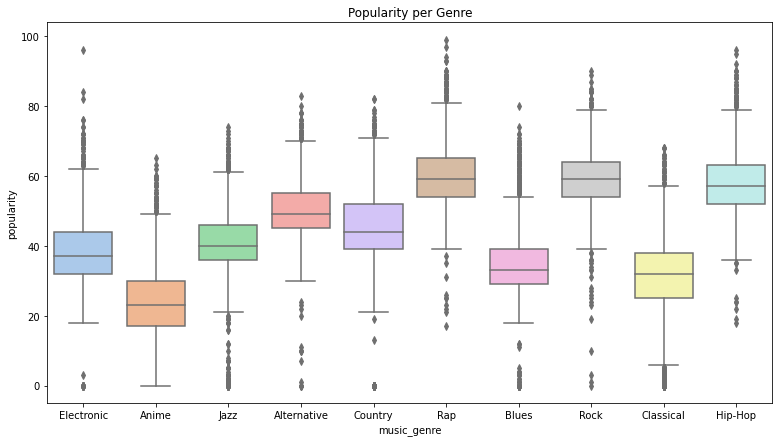

In [40]:
plt.figure(figsize=(13,7))
plt.title('Popularity per Genre')
sns.boxplot(x = df['music_genre'], y = df['popularity'], palette='pastel')
plt.show()

In [41]:
df.groupby('music_genre')['acousticness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,0.165818,0.243361,0.000001,0.002125,0.0339,0.24250,0.992
Anime,4064.0,0.283650,0.360494,0.000000,0.004925,0.0641,0.56100,0.996
Blues,4046.0,0.312226,0.304514,0.000002,0.035950,0.2030,0.54675,0.996
Classical,4036.0,0.870412,0.255927,0.000001,0.910000,0.9680,0.98900,0.996
Country,4049.0,0.271384,0.262034,0.000028,0.049000,0.1830,0.43800,0.971
Electronic,4032.0,0.124051,0.204155,0.000002,0.003872,0.0262,0.14400,0.985
Hip-Hop,4077.0,0.178435,0.189996,0.000015,0.033500,0.1070,0.26600,0.985
Jazz,4064.0,0.494101,0.339758,0.000005,0.154000,0.5095,0.82200,0.996
Rap,4042.0,0.171080,0.193825,0.000007,0.024400,0.0948,0.25675,0.942


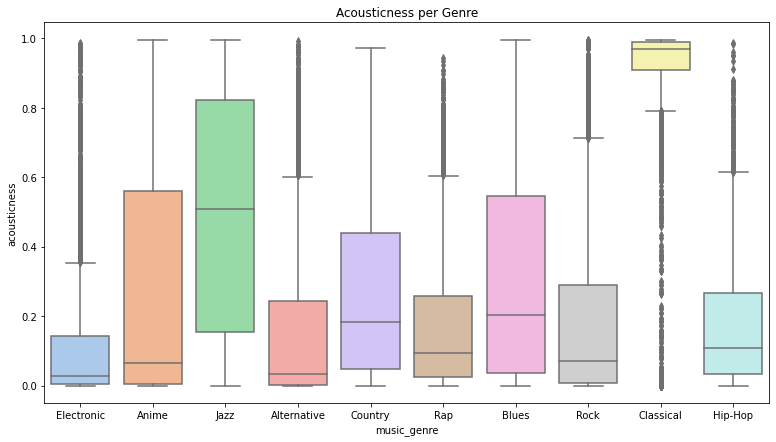

In [42]:
plt.figure(figsize=(13,7))
plt.title('Acousticness per Genre')
sns.boxplot(x = df['music_genre'], y = df['acousticness'], palette='pastel')
plt.show()

In [43]:
df.groupby('music_genre')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,0.543548,0.150107,0.0617,0.44200,0.541,0.64550,0.971
Anime,4064.0,0.471435,0.149342,0.0606,0.37800,0.488,0.57825,0.888
Blues,4046.0,0.527317,0.144812,0.1180,0.42500,0.529,0.63300,0.967
Classical,4036.0,0.306723,0.135046,0.0600,0.19900,0.302,0.40300,0.775
Country,4049.0,0.576436,0.109647,0.2030,0.50800,0.579,0.64700,0.953
Electronic,4032.0,0.620173,0.147769,0.0822,0.53000,0.631,0.72500,0.969
Hip-Hop,4077.0,0.716462,0.130875,0.2300,0.63800,0.731,0.81400,0.986
Jazz,4064.0,0.584422,0.159326,0.0596,0.47175,0.600,0.70400,0.976
Rap,4042.0,0.696837,0.140227,0.1970,0.60400,0.714,0.80100,0.977


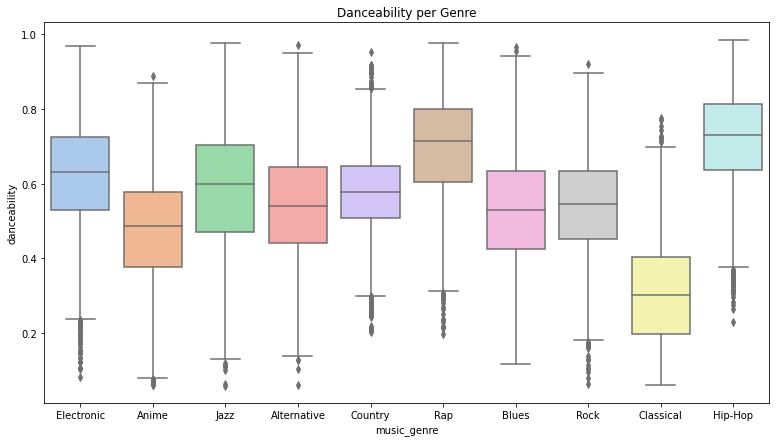

In [44]:
plt.figure(figsize=(13,7))
plt.title('Danceability per Genre')
sns.boxplot(x = df['music_genre'], y = df['danceability'], palette='pastel')
plt.show()

In [45]:
df.groupby('music_genre')['duration_ms'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,233401.847692,60734.054291,24000.0,197612.00,226207.0,259721.00,675653.0
Anime,4064.0,231378.483760,84410.499218,30027.0,184935.25,239941.0,279069.50,1295600.0
Blues,4046.0,253432.844291,112627.425505,30097.0,186367.75,230346.5,287773.25,2019293.0
Classical,4036.0,310510.827552,211533.485083,15509.0,180280.25,262676.0,380024.50,3195440.0
Country,4049.0,216708.237837,44577.509817,56227.0,188500.00,211500.0,237162.00,599315.0
Electronic,4032.0,269823.285714,138608.890995,34289.0,206400.00,244965.5,309866.25,4497994.0
Hip-Hop,4077.0,219770.169733,59559.732159,33093.0,182582.00,215040.0,253333.00,723573.0
Jazz,4064.0,264350.728593,115035.635345,19693.0,189526.50,247682.0,313803.00,1352413.0
Rap,4042.0,219015.521524,57209.319792,59118.0,183483.50,214533.5,249666.75,579293.0


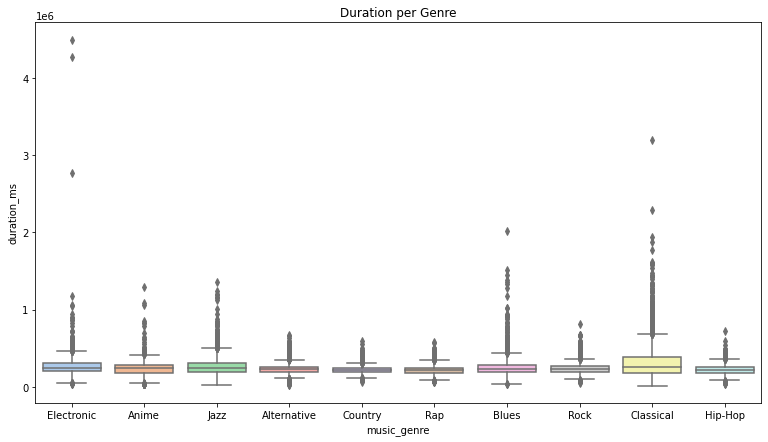

In [46]:
plt.figure(figsize=(13,7))
plt.title('Duration per Genre')
sns.boxplot(x = df['music_genre'], y = df['duration_ms'], palette='pastel')
plt.show()

In [47]:
no_out_dur = df[df["duration_ms"] < 1000000]
no_out_dur.shape

(40477, 14)

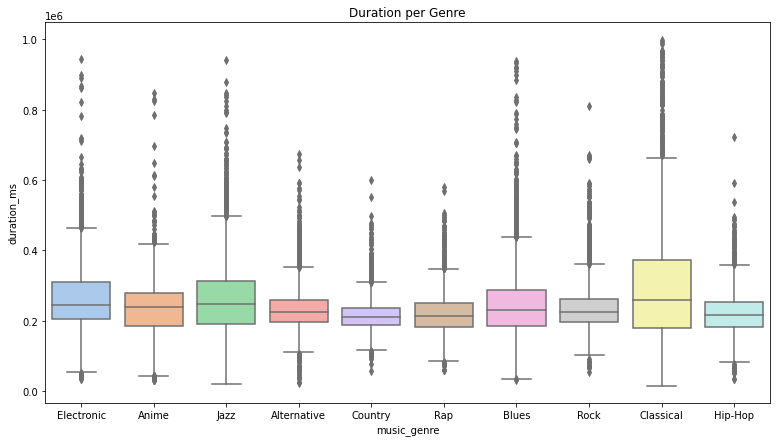

In [48]:
plt.figure(figsize=(13,7))
plt.title('Duration per Genre')
sns.boxplot(x = no_out_dur['music_genre'], y = no_out_dur['duration_ms'], palette='pastel')
plt.show()

In [49]:
df.groupby('music_genre')['instrumentalness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,0.060642,0.174286,0.0,0.000000,0.000067,0.006690,0.942
Anime,4064.0,0.275696,0.389760,0.0,0.000000,0.000405,0.757250,0.996
Blues,4046.0,0.093796,0.212904,0.0,0.000009,0.000929,0.038375,0.961
Classical,4036.0,0.603554,0.378188,0.0,0.156000,0.837500,0.907000,0.994
Country,4049.0,0.005839,0.044699,0.0,0.000000,0.000000,0.000038,0.880
Electronic,4032.0,0.351582,0.363149,0.0,0.003337,0.186000,0.756000,0.986
Hip-Hop,4077.0,0.010464,0.072799,0.0,0.000000,0.000000,0.000011,0.927
Jazz,4064.0,0.354021,0.383009,0.0,0.000172,0.121000,0.795000,0.985
Rap,4042.0,0.008686,0.063096,0.0,0.000000,0.000000,0.000010,0.922


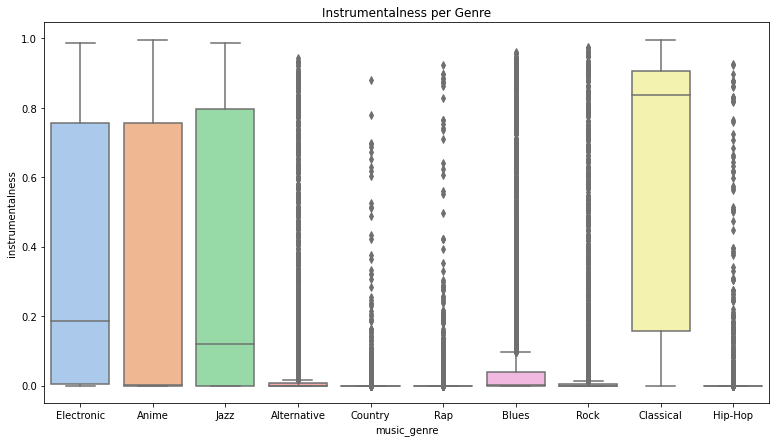

In [50]:
plt.figure(figsize=(13,7))
plt.title('Instrumentalness per Genre')
sns.boxplot(x = df['music_genre'], y = df['instrumentalness'], palette='pastel')
plt.show()

In [51]:
df['instrumentalness'].value_counts()

0.000000    12175
0.898000       59
0.902000       57
0.912000       57
0.923000       55
            ...  
0.000621        1
0.000815        1
0.000007        1
0.000009        1
0.000926        1
Name: instrumentalness, Length: 4974, dtype: int64

In [52]:
df.drop("instrumentalness", axis = 1, inplace = True)

In [53]:
df.groupby('music_genre')['liveness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,0.196118,0.153466,0.02120,0.099550,0.132,0.2550,0.996
Anime,4064.0,0.193509,0.138524,0.01690,0.099000,0.137,0.2760,0.967
Blues,4046.0,0.233495,0.221734,0.00967,0.097700,0.137,0.2870,1.000
Classical,4036.0,0.162306,0.145237,0.02250,0.089200,0.110,0.1570,0.987
Country,4049.0,0.185417,0.150789,0.02120,0.098500,0.127,0.2270,0.984
Electronic,4032.0,0.210307,0.177373,0.01730,0.095975,0.128,0.2880,0.984
Hip-Hop,4077.0,0.201357,0.154123,0.01960,0.103000,0.136,0.2620,0.989
Jazz,4064.0,0.172591,0.147095,0.02670,0.094500,0.115,0.1840,0.986
Rap,4042.0,0.197174,0.149682,0.02080,0.103000,0.135,0.2550,0.989


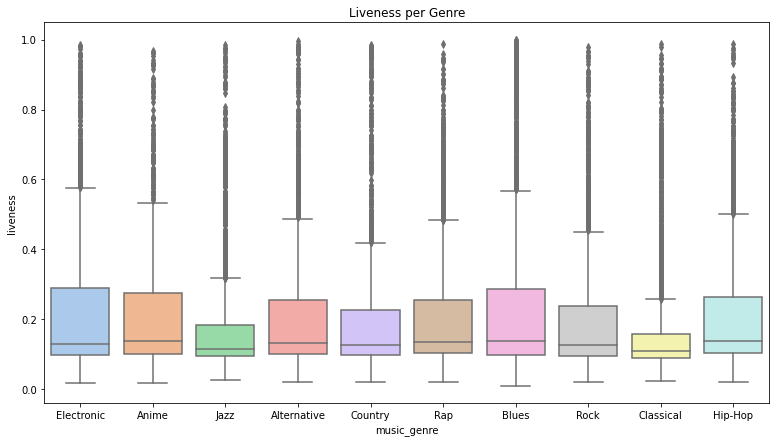

In [54]:
plt.figure(figsize=(13,7))
plt.title('Liveness per Genre')
sns.boxplot(x = df['music_genre'], y = df['liveness'], palette='pastel')
plt.show()

In [55]:
df.groupby('music_genre')['loudness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,-6.526353,2.772828,-22.191,-7.96700,-5.9930,-4.4955,1.342
Anime,4064.0,-7.910208,6.185775,-41.234,-10.59100,-5.6850,-3.5835,1.893
Blues,4046.0,-8.949297,3.803674,-31.284,-11.24700,-8.3835,-6.1450,3.744
Classical,4036.0,-21.629532,7.703023,-47.046,-26.47375,-21.9225,-17.2945,-2.304
Country,4049.0,-7.323265,3.218886,-27.119,-8.83200,-6.5690,-5.0340,-0.521
Electronic,4032.0,-7.072186,3.694357,-25.582,-9.36950,-6.4685,-4.4065,1.585
Hip-Hop,4077.0,-6.821617,2.465723,-25.602,-8.14800,-6.4790,-5.1740,1.012
Jazz,4064.0,-11.182938,4.684744,-35.200,-13.59175,-10.3460,-7.8435,-1.002
Rap,4042.0,-6.668378,2.407426,-20.188,-7.96575,-6.3655,-5.0540,-0.092


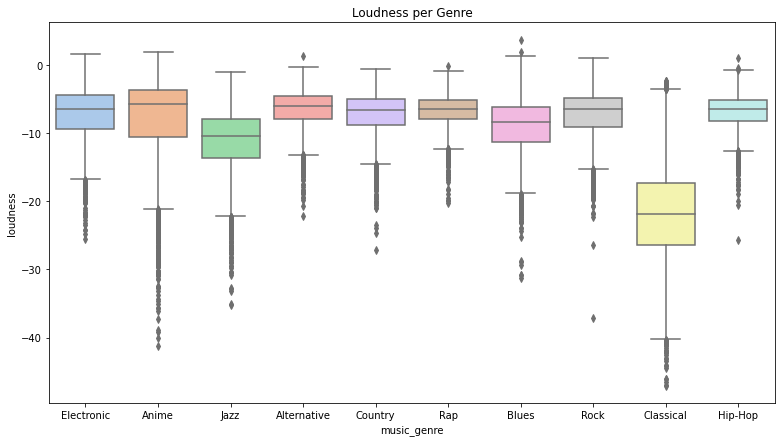

In [56]:
plt.figure(figsize=(13,7))
plt.title('Loudness per Genre')
sns.boxplot(x = df['music_genre'], y = df['loudness'], palette='pastel')
plt.show()

In [57]:
df.groupby('music_genre')['speechiness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,0.088907,0.092495,0.0231,0.035950,0.05230,0.096850,0.918
Anime,4064.0,0.064674,0.053009,0.0229,0.034700,0.04520,0.070800,0.498
Blues,4046.0,0.062552,0.062887,0.0231,0.033900,0.04320,0.065900,0.942
Classical,4036.0,0.051597,0.038441,0.0244,0.038400,0.04330,0.050500,0.631
Country,4049.0,0.049078,0.049164,0.0223,0.029500,0.03440,0.045600,0.689
Electronic,4032.0,0.099289,0.100165,0.0234,0.040100,0.05760,0.109000,0.774
Hip-Hop,4077.0,0.206740,0.136435,0.0246,0.085800,0.19100,0.299000,0.932
Jazz,4064.0,0.073962,0.082782,0.0226,0.035300,0.04385,0.067725,0.939
Rap,4042.0,0.187059,0.132022,0.0229,0.070525,0.16150,0.279000,0.922


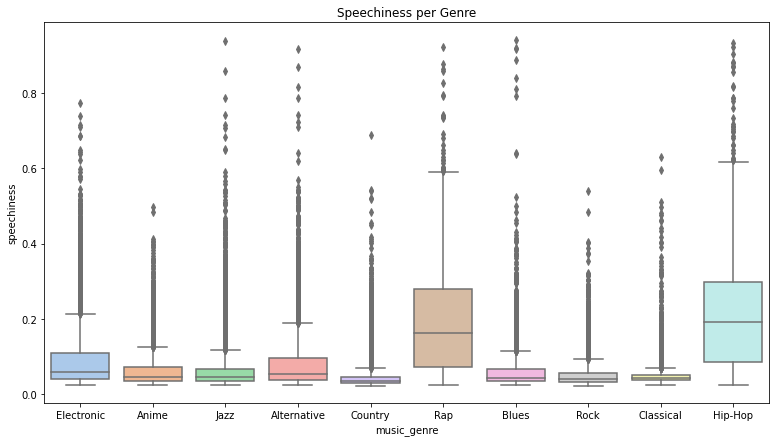

In [58]:
plt.figure(figsize=(13,7))
plt.title('Speechiness per Genre')
sns.boxplot(x = df['music_genre'], y = df['speechiness'], palette='pastel')
plt.show()

In [59]:
df.groupby('music_genre')['tempo'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,122.398682,30.142498,44.19,96.9600,120.050,143.9900,213.79
Anime,4064.0,126.688632,33.010958,47.70,98.9600,127.960,149.9725,220.28
Blues,4046.0,121.296876,30.344347,47.59,97.6250,118.095,141.0325,215.92
Classical,4036.0,103.917019,31.015658,34.35,79.1725,96.305,127.2050,212.92
Country,4049.0,123.976436,30.169227,55.51,99.8200,123.410,144.9900,217.54
Electronic,4032.0,125.775513,26.299248,35.55,107.9775,125.970,144.9500,218.03
Hip-Hop,4077.0,119.900812,30.015621,47.09,93.7700,120.060,141.2700,213.79
Jazz,4064.0,111.613327,29.652730,34.76,90.0000,104.800,127.9250,213.04
Rap,4042.0,120.428221,29.363902,47.81,94.9825,120.145,140.5475,207.99


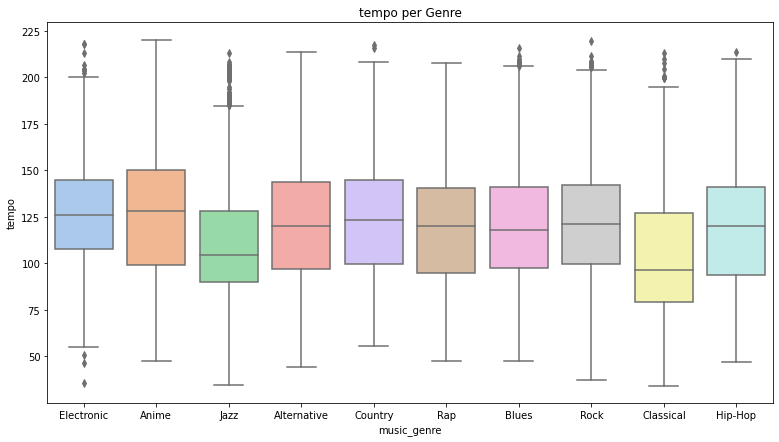

In [60]:
plt.figure(figsize=(13,7))
plt.title('tempo per Genre')
sns.boxplot(x = df['music_genre'], y = df['tempo'], palette='pastel')
plt.show()

In [61]:
df.groupby('music_genre')['valence'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Alternative,4051.0,0.448641,0.216153,0.0342,0.28450,0.432,0.60000,0.978
Anime,4064.0,0.436103,0.247798,0.0000,0.23100,0.436,0.62400,0.989
Blues,4046.0,0.577852,0.224636,0.0315,0.40825,0.586,0.75600,0.985
Classical,4036.0,0.210925,0.198215,0.0000,0.05665,0.140,0.30700,0.982
Country,4049.0,0.537257,0.222076,0.0404,0.35900,0.527,0.71700,0.977
Electronic,4032.0,0.391775,0.240121,0.0205,0.19175,0.361,0.56125,0.992
Hip-Hop,4077.0,0.476371,0.221229,0.0336,0.30400,0.476,0.64600,0.979
Jazz,4064.0,0.507923,0.250199,0.0289,0.29600,0.514,0.70700,0.985
Rap,4042.0,0.456343,0.212397,0.0336,0.29100,0.448,0.61300,0.970


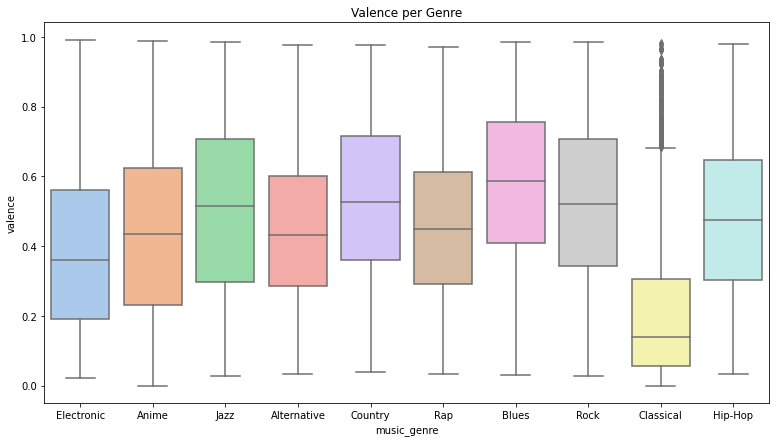

In [62]:
plt.figure(figsize=(13,7))
plt.title('Valence per Genre')
sns.boxplot(x = df['music_genre'], y = df['valence'], palette='pastel')
plt.show()

## Modeling

In [63]:
df['mode'] = df['mode'].replace({'Minor' : 0,'Major' : 1})

In [64]:
X = df.drop('music_genre',axis=1).values
y = df['music_genre'].values

In [77]:
def classification_metrics(y_valid, y_pred, labels):

    print('Classification Report for the validation set:\n')
    print(classification_report(y_valid, y_pred, target_names=labels.classes_))
    print('Confusion Matrix:\n')
    cm = confusion_matrix(y_valid, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.classes_)
    fig, ax = plt.subplots(figsize=(12,8))
    disp.plot(cmap=plt.cm.OrRd,ax=ax)

    plt.xticks(rotation=90)  
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")

    plt.show()

In [78]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [79]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [80]:
X_train[1][5]

'F#'

In [81]:
ct_obj =  ColumnTransformer(transformers= [("encoder", OneHotEncoder(),[5])] , remainder="passthrough") 
X_train=np.array(ct_obj.fit_transform(X_train))
X_test=np.array(ct_obj.transform(X_test))

In [82]:
X_train[1]

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 48.0,
       0.0541, 0.703, 203800.0, 0.585, 0.129, -7.602, 0, 0.0443, 93.07,
       0.562], dtype=object)

In [83]:
y_train[1]

8

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
X_train[1]

array([-0.33193141, -0.26676671, -0.28626251, -0.35349455, -0.34776059,
       -0.34155249, -0.18321819, -0.28726948, -0.30628712,  3.90401384,
       -0.35695697, -0.26598823,  0.24355713, -0.73714542,  0.81251881,
       -0.37943281, -0.05704857, -0.40232509,  0.24875749, -1.33278182,
       -0.48238019, -0.87749741,  0.42231603])

### Logistic Regression

#### First Implementation

In [86]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [87]:
y_pred = model.predict(X_test)

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.37      0.31      0.34       978
       Anime       0.62      0.64      0.63      1021
       Blues       0.47      0.39      0.43       956
   Classical       0.78      0.82      0.80      1006
     Country       0.43      0.48      0.45      1011
  Electronic       0.52      0.56      0.54      1006
     Hip-Hop       0.42      0.49      0.45       999
        Jazz       0.46      0.43      0.45      1019
         Rap       0.48      0.36      0.41      1082
        Rock       0.53      0.64      0.58      1062

    accuracy                           0.51     10140
   macro avg       0.51      0.51      0.51     10140
weighted avg       0.51      0.51      0.51     10140

Confusion Matrix:



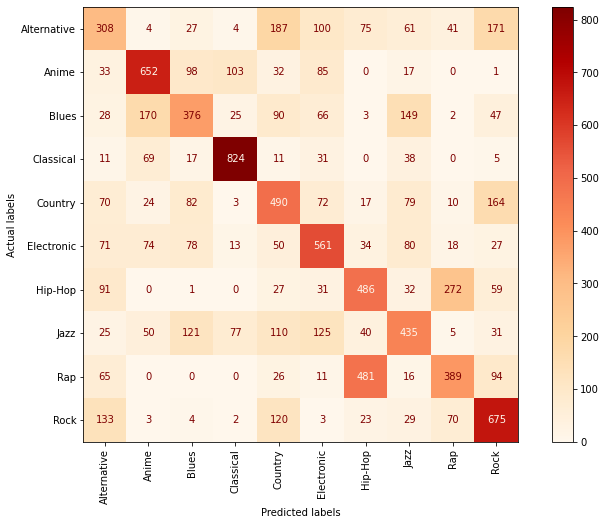

In [88]:
classification_metrics(y_test, y_pred, encoder)

#### Grid Search

In [89]:
f1 = make_scorer(f1_score, average = "weighted")

In [90]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l2"]}
gs= GridSearchCV(estimator= LogisticRegression(), param_grid=param_grid, scoring=f1,cv=4, verbose =1)

In [91]:
gs.fit(X_train,y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [92]:
best_score= gs.best_score_
best_parameters=gs.best_params_

print("Best Accuracy:", best_score) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.5075451227105936
Best Parameters: {'C': 10.0, 'penalty': 'l2'}


Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.37      0.32      0.34       978
       Anime       0.62      0.64      0.63      1021
       Blues       0.47      0.39      0.43       956
   Classical       0.78      0.82      0.80      1006
     Country       0.43      0.48      0.46      1011
  Electronic       0.52      0.56      0.54      1006
     Hip-Hop       0.42      0.49      0.45       999
        Jazz       0.47      0.43      0.45      1019
         Rap       0.48      0.36      0.41      1082
        Rock       0.53      0.64      0.58      1062

    accuracy                           0.51     10140
   macro avg       0.51      0.51      0.51     10140
weighted avg       0.51      0.51      0.51     10140

Confusion Matrix:



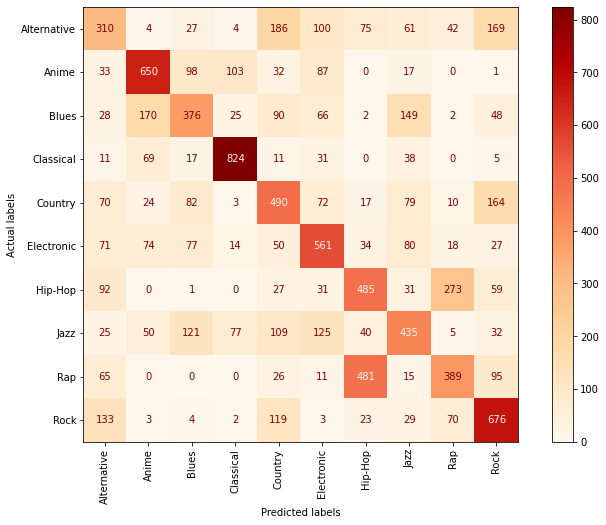

In [93]:
model = LogisticRegression(C = 10.0, penalty = 'l2')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred, encoder)

### Random Forrest

#### First Implementation

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.38      0.35      0.36       978
       Anime       0.74      0.74      0.74      1021
       Blues       0.53      0.44      0.48       956
   Classical       0.82      0.85      0.83      1006
     Country       0.56      0.49      0.53      1011
  Electronic       0.60      0.55      0.57      1006
     Hip-Hop       0.34      0.43      0.38       999
        Jazz       0.50      0.50      0.50      1019
         Rap       0.34      0.29      0.31      1082
        Rock       0.47      0.60      0.53      1062

    accuracy                           0.52     10140
   macro avg       0.53      0.52      0.52     10140
weighted avg       0.53      0.52      0.52     10140

Confusion Matrix:



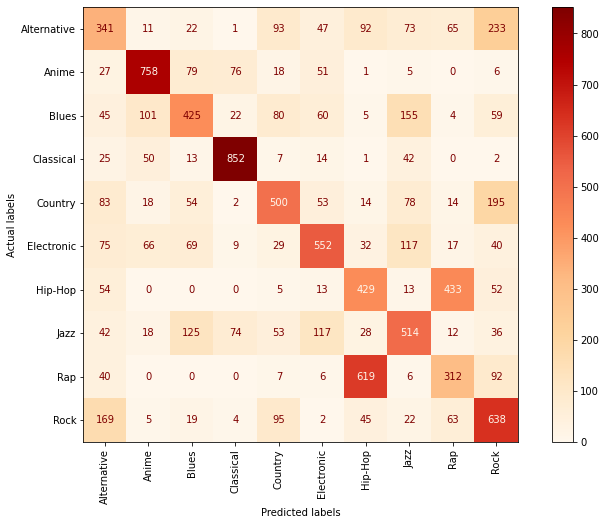

In [94]:
model= RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred, encoder)

#### Grid Search

In [132]:
params = {
    "n_estimators": [10, 30, 50, 80, 100],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 3, 5],
    'max_features' : ['sqrt', 'log2']
}

In [133]:
gs= GridSearchCV(estimator= RandomForestClassifier(), param_grid=params, scoring=f1,cv=4, verbose =5)

In [134]:
gs.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV 1/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.401 total time=   0.2s
[CV 2/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.406 total time=   0.3s
[CV 3/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.400 total time=   0.4s
[CV 4/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.438 total time=   0.3s
[CV 1/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.441 total time=   0.9s
[CV 2/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.451 total time=   0.6s
[CV 3/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.452 total time=   0.6s
[CV 4/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.450 total time=   0.6s
[CV 1/4] END max_depth=5,

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 30, 50, 80, 100]},
             scoring=make_scorer(f1_score, average=weighted), verbose=5)

In [136]:
best_score= gs.best_score_
best_parameters=gs.best_params_

print("Best Accuracy:", best_score) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.5462594555399963
Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 100}


Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.46      0.37      0.41       978
       Anime       0.75      0.74      0.74      1021
       Blues       0.58      0.46      0.51       956
   Classical       0.82      0.85      0.83      1006
     Country       0.58      0.49      0.53      1011
  Electronic       0.61      0.56      0.58      1006
     Hip-Hop       0.34      0.46      0.39       999
        Jazz       0.51      0.51      0.51      1019
         Rap       0.34      0.27      0.30      1082
        Rock       0.49      0.71      0.58      1062

    accuracy                           0.54     10140
   macro avg       0.55      0.54      0.54     10140
weighted avg       0.55      0.54      0.54     10140

Confusion Matrix:



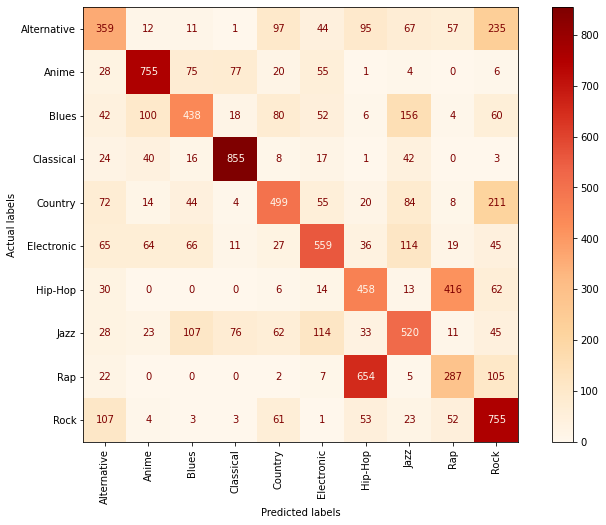

In [95]:
model= RandomForestClassifier(max_depth = 25, min_samples_leaf = 5, n_estimators= 100, max_features= 'sqrt')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred, encoder)

### Neural Networks

#### First Implementation

In [96]:
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [97]:
genre_encoder = OneHotEncoder(sparse=False)
y_train_nn=y_train.reshape(-1, 1)
y_test_nn=y_test.reshape(-1, 1)
y_train_nn=genre_encoder.fit_transform(y_train_nn)
y_test_nn=genre_encoder.transform(y_test_nn)

In [98]:
y_train_nn[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [99]:
batch_size = [32, 64]
epochs = [20, 40]
optimizer = ['RMSprop', 'Adam']
neurons = [64, 128]

def create_model(neurons=neurons, epochs=epochs, optimizer=optimizer, batch_size=batch_size):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [100]:
ann_model = create_model(neurons = 128, epochs = 40, optimizer = 'Adam', batch_size = 64)

In [101]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history=ann_model.fit(X_train, y_train_nn, validation_data=(X_test, y_test_nn),batch_size=64,epochs=40,callbacks=[es])

Epoch 1/40
476/476 [==============================] - 3s 4ms/step - loss: 1.5341 - accuracy: 0.4271 - val_loss: 1.2930 - val_accuracy: 0.5101
Epoch 2/40
476/476 [==============================] - 2s 4ms/step - loss: 1.3273 - accuracy: 0.4981 - val_loss: 1.2503 - val_accuracy: 0.5297
Epoch 3/40
476/476 [==============================] - 2s 3ms/step - loss: 1.2804 - accuracy: 0.5156 - val_loss: 1.2361 - val_accuracy: 0.5358
Epoch 4/40
476/476 [==============================] - 2s 4ms/step - loss: 1.2546 - accuracy: 0.5226 - val_loss: 1.2135 - val_accuracy: 0.5324
Epoch 5/40
476/476 [==============================] - 4s 8ms/step - loss: 1.2345 - accuracy: 0.5307 - val_loss: 1.1979 - val_accuracy: 0.5457
Epoch 6/40
476/476 [==============================] - 4s 8ms/step - loss: 1.2179 - accuracy: 0.5377 - val_loss: 1.1881 - val_accuracy: 0.5367
Epoch 7/40
476/476 [==============================] - 4s 8ms/step - loss: 1.2068 - accuracy: 0.5406 - val_loss: 1.1843 - val_accuracy: 0.5386
Epoch 

In [102]:
y_pred_nn = ann_model.predict(X_test)

317/317 [==============================] - 1s 1ms/step


In [103]:
label_true = tf.argmax(y_test_nn, axis = 1)
label_pred = tf.argmax(y_pred_nn, axis = 1)

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.44      0.38      0.41       978
       Anime       0.79      0.69      0.74      1021
       Blues       0.56      0.50      0.53       956
   Classical       0.83      0.85      0.84      1006
     Country       0.55      0.54      0.55      1011
  Electronic       0.64      0.60      0.62      1006
     Hip-Hop       0.41      0.72      0.52       999
        Jazz       0.54      0.49      0.51      1019
         Rap       0.48      0.19      0.28      1082
        Rock       0.50      0.71      0.59      1062

    accuracy                           0.57     10140
   macro avg       0.58      0.57      0.56     10140
weighted avg       0.58      0.57      0.56     10140

Confusion Matrix:



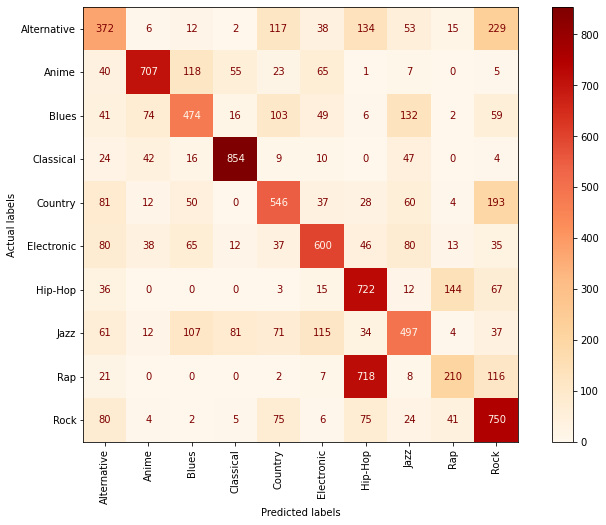

In [104]:
classification_metrics(label_true, label_pred, encoder)

#### Random Search

In [155]:
param_opt = dict(batch_size=batch_size, epochs=epochs, neurons=neurons, optimizer = optimizer)

In [156]:
model_RandomSearch = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-156-5469796f24eb>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_RandomSearch = KerasClassifier(build_fn=create_model, verbose=0)


In [157]:
random = RandomizedSearchCV(estimator=model_RandomSearch, param_distributions=param_opt, n_jobs=1, cv=3, verbose = 5, n_iter = 5)

In [158]:
random_result = random.fit(X_train, y_train_nn)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END batch_size=32, epochs=20, neurons=128, optimizer=RMSprop;, score=0.552 total time=  21.9s
[CV 2/3] END batch_size=32, epochs=20, neurons=128, optimizer=RMSprop;, score=0.559 total time=  21.6s
[CV 3/3] END batch_size=32, epochs=20, neurons=128, optimizer=RMSprop;, score=0.565 total time=  21.0s
[CV 1/3] END batch_size=32, epochs=40, neurons=128, optimizer=RMSprop;, score=0.558 total time=  42.4s
[CV 2/3] END batch_size=32, epochs=40, neurons=128, optimizer=RMSprop;, score=0.555 total time=  40.5s
[CV 3/3] END batch_size=32, epochs=40, neurons=128, optimizer=RMSprop;, score=0.557 total time=  42.5s
[CV 1/3] END batch_size=32, epochs=40, neurons=64, optimizer=Adam;, score=0.557 total time=  42.7s
[CV 2/3] END batch_size=32, epochs=40, neurons=64, optimizer=Adam;, score=0.562 total time=  42.0s
[CV 3/3] END batch_size=32, epochs=40, neurons=64, optimizer=Adam;, score=0.562 total time=  42.0s
[CV 1/3] END batch_size=6

In [159]:
print('according to randomsearch the best parameters are : ')
print('batch_size : ' + str(random_result.best_params_['batch_size']))
print('epochs : ' + str(random_result.best_params_['epochs']))
print('neurons : ' + str(random_result.best_params_['neurons']))
print('optimizer : ' + str(random_result.best_params_['optimizer']))

according to randomsearch the best parameters are : 
batch_size : 32
epochs : 40
neurons : 64
optimizer : Adam


In [105]:
ann_model = create_model(neurons = 64, epochs = 40, optimizer = 'Adam', batch_size = 32)
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history=ann_model.fit(X_train, y_train_nn, validation_data=(X_test, y_test_nn),batch_size=32,epochs=40,callbacks=[es])

Epoch 1/40
951/951 [==============================] - 3s 3ms/step - loss: 1.5630 - accuracy: 0.4152 - val_loss: 1.3069 - val_accuracy: 0.5032
Epoch 2/40
951/951 [==============================] - 3s 3ms/step - loss: 1.3554 - accuracy: 0.4882 - val_loss: 1.2594 - val_accuracy: 0.5230
Epoch 3/40
951/951 [==============================] - 3s 3ms/step - loss: 1.3106 - accuracy: 0.5048 - val_loss: 1.2419 - val_accuracy: 0.5283
Epoch 4/40
951/951 [==============================] - 3s 3ms/step - loss: 1.2862 - accuracy: 0.5127 - val_loss: 1.2225 - val_accuracy: 0.5308
Epoch 5/40
951/951 [==============================] - 3s 3ms/step - loss: 1.2679 - accuracy: 0.5184 - val_loss: 1.2115 - val_accuracy: 0.5372
Epoch 6/40
951/951 [==============================] - 3s 3ms/step - loss: 1.2578 - accuracy: 0.5229 - val_loss: 1.2035 - val_accuracy: 0.5420
Epoch 7/40
951/951 [==============================] - 3s 3ms/step - loss: 1.2495 - accuracy: 0.5261 - val_loss: 1.1991 - val_accuracy: 0.5451
Epoch 

In [106]:
y_pred_nn = ann_model.predict(X_test)

317/317 [==============================] - 0s 1ms/step


In [107]:
label_true = tf.argmax(y_test_nn, axis = 1)
label_pred = tf.argmax(y_pred_nn, axis = 1)

Classification Report for the validation set:

              precision    recall  f1-score   support

 Alternative       0.46      0.34      0.39       978
       Anime       0.71      0.76      0.74      1021
       Blues       0.54      0.49      0.51       956
   Classical       0.83      0.84      0.83      1006
     Country       0.60      0.44      0.51      1011
  Electronic       0.63      0.56      0.59      1006
     Hip-Hop       0.41      0.67      0.51       999
        Jazz       0.54      0.48      0.50      1019
         Rap       0.47      0.25      0.33      1082
        Rock       0.49      0.78      0.60      1062

    accuracy                           0.56     10140
   macro avg       0.57      0.56      0.55     10140
weighted avg       0.57      0.56      0.55     10140

Confusion Matrix:



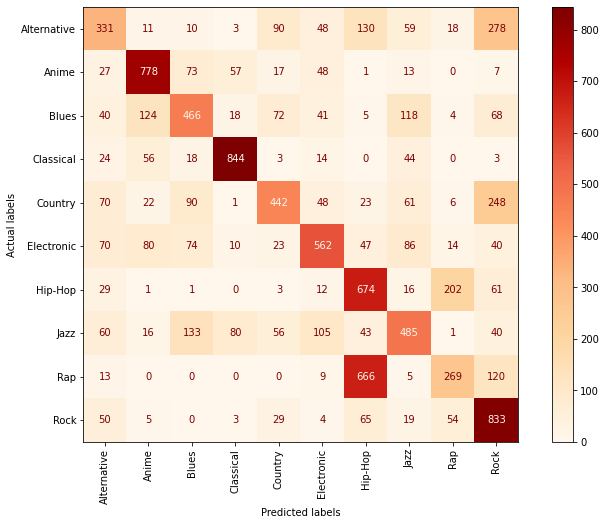

In [108]:
classification_metrics(label_true, label_pred, encoder)

## Genre Combination

### Data Manipulation

In [109]:
cpy_df = df.copy()

In [110]:
def combine_labels(genre):
  if genre in ['Rock', 'Alternative', 'Country']:
    return 'Rock, Alternative and Country'
  elif genre in ['Rap', 'Hip-Hop']:
    return 'Rap and Hip-Hop'
  elif genre in ['Jazz', 'Blues', 'Electronic']:
    return 'Jazz, Blues and Electronic'
  else:
    return genre

In [111]:
df['music_genre'] = df['music_genre'].apply(combine_labels)

In [112]:
X = df.drop('music_genre',axis=1).values
y = df['music_genre'].values

In [113]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [114]:
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [115]:
ct_obj =  ColumnTransformer(transformers= [("encoder", OneHotEncoder(),[5])] , remainder="passthrough") 
X_train=np.array(ct_obj.fit_transform(X_train))
X_test=np.array(ct_obj.transform(X_test))

In [116]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

#### First Implementation

In [117]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [118]:
y_pred = model.predict(X_test)

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.67      0.54      0.60      1021
                    Classical       0.82      0.80      0.81      1006
   Jazz, Blues and Electronic       0.67      0.70      0.69      2981
              Rap and Hip-Hop       0.81      0.78      0.80      2081
Rock, Alternative and Country       0.70      0.73      0.72      3051

                     accuracy                           0.72     10140
                    macro avg       0.73      0.71      0.72     10140
                 weighted avg       0.72      0.72      0.72     10140

Confusion Matrix:



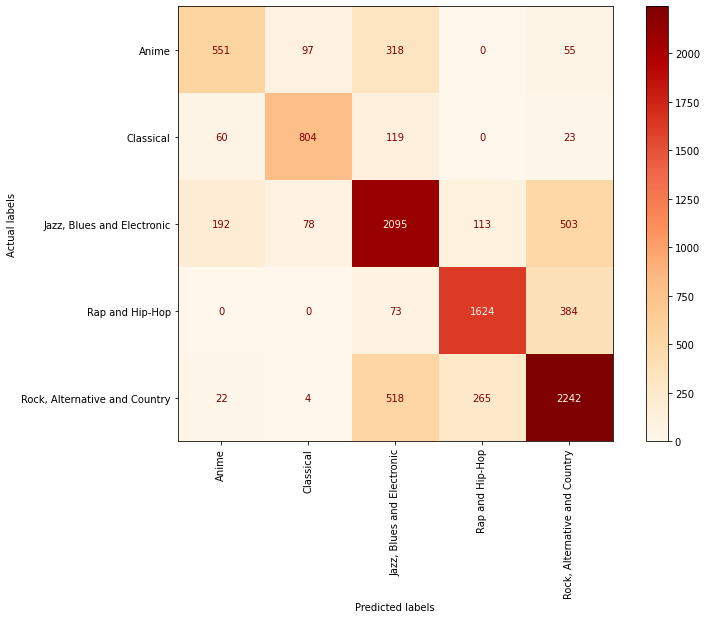

In [119]:
classification_metrics(y_test, y_pred, encoder)

#### Grid Search

In [176]:
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l2"]}
gs= GridSearchCV(estimator= LogisticRegression(), param_grid=param_grid, scoring=f1,cv=4, verbose =1)

In [177]:
gs.fit(X_train,y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2']},
             scoring=make_scorer(f1_score, average=weighted), verbose=1)

In [178]:
best_score= gs.best_score_
best_parameters=gs.best_params_

print("Best Accuracy:", best_score) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.7202802841254621
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.67      0.54      0.60      1021
                    Classical       0.82      0.80      0.81      1006
   Jazz, Blues and Electronic       0.67      0.70      0.69      2981
              Rap and Hip-Hop       0.81      0.78      0.80      2081
Rock, Alternative and Country       0.70      0.74      0.72      3051

                     accuracy                           0.72     10140
                    macro avg       0.73      0.71      0.72     10140
                 weighted avg       0.72      0.72      0.72     10140

Confusion Matrix:



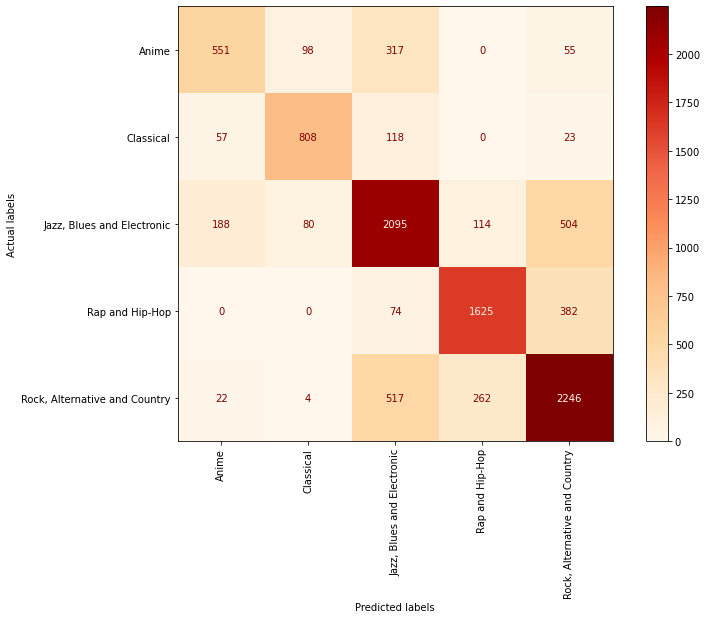

In [120]:
model = LogisticRegression(C = 0.1, penalty = 'l2')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred, encoder)

### Random Forrest

#### First Implementation

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.82      0.64      0.72      1021
                    Classical       0.84      0.83      0.84      1006
   Jazz, Blues and Electronic       0.74      0.77      0.76      2981
              Rap and Hip-Hop       0.82      0.86      0.84      2081
Rock, Alternative and Country       0.76      0.76      0.76      3051

                     accuracy                           0.78     10140
                    macro avg       0.80      0.77      0.78     10140
                 weighted avg       0.78      0.78      0.78     10140

Confusion Matrix:



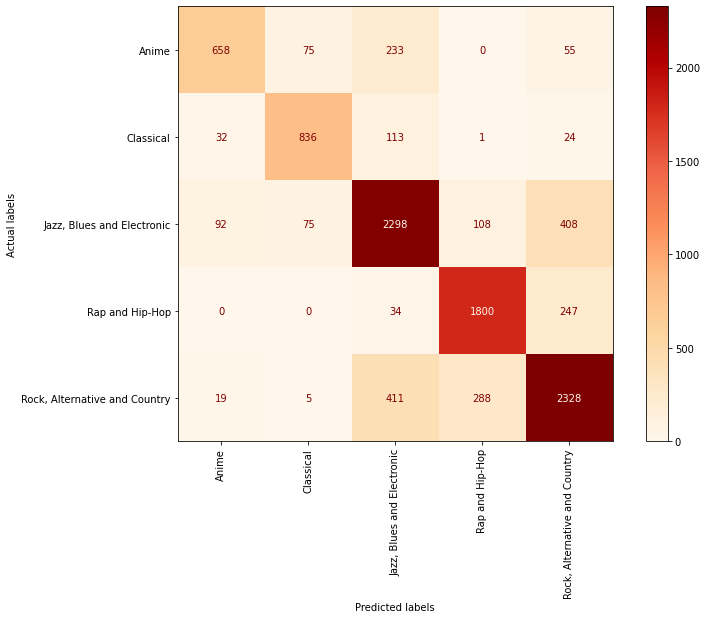

In [121]:
model= RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred, encoder)

#### Grid Search

In [181]:
params = {
    "n_estimators": [10, 30, 50, 80, 100],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 3, 5],
    'max_features' : ['sqrt', 'log2']
}

In [182]:
gs= GridSearchCV(estimator= RandomForestClassifier(), param_grid=params, scoring=f1,cv=4, verbose =5)

In [183]:
gs.fit(X_train,y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV 1/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.667 total time=   0.2s
[CV 2/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.646 total time=   0.2s
[CV 3/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.695 total time=   0.2s
[CV 4/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=10;, score=0.692 total time=   0.2s
[CV 1/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.666 total time=   0.6s
[CV 2/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.650 total time=   0.6s
[CV 3/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.671 total time=   0.6s
[CV 4/4] END max_depth=5, max_features=sqrt, min_samples_leaf=1, n_estimators=30;, score=0.659 total time=   0.9s
[CV 1/4] END max_depth=5,

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 30, 50, 80, 100]},
             scoring=make_scorer(f1_score, average=weighted), verbose=5)

In [184]:
best_score= gs.best_score_
best_parameters=gs.best_params_

print("Best Accuracy:", best_score) 
print("Best Parameters:", best_parameters )

Best Accuracy: 0.7776059522895158
Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 100}


Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.83      0.63      0.72      1021
                    Classical       0.85      0.83      0.84      1006
   Jazz, Blues and Electronic       0.74      0.77      0.76      2981
              Rap and Hip-Hop       0.82      0.87      0.84      2081
Rock, Alternative and Country       0.76      0.78      0.77      3051

                     accuracy                           0.78     10140
                    macro avg       0.80      0.77      0.79     10140
                 weighted avg       0.79      0.78      0.78     10140

Confusion Matrix:



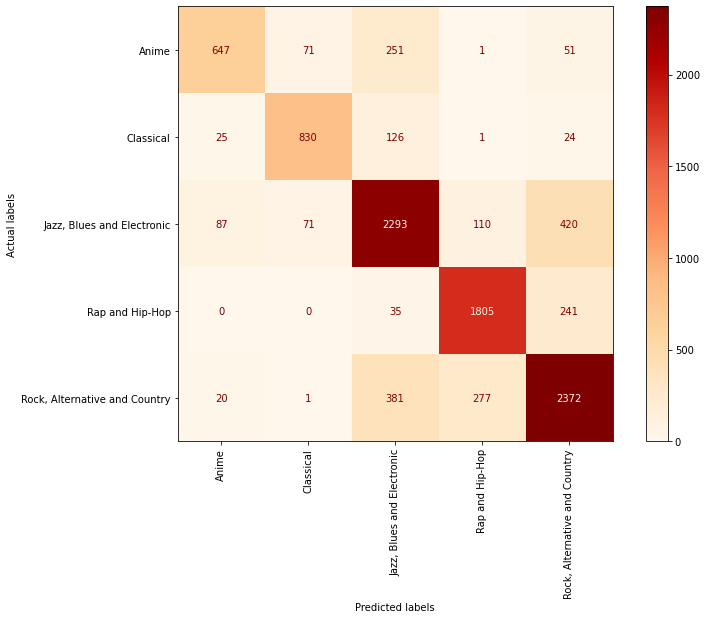

In [122]:
model= RandomForestClassifier(max_depth = 25, min_samples_leaf = 3, n_estimators= 100, max_features= 'sqrt')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
classification_metrics(y_test, y_pred, encoder)

### Neural Network

#### First Implementation

In [123]:
genre_encoder = OneHotEncoder(sparse=False)
y_train_nn=y_train.reshape(-1, 1)
y_test_nn=y_test.reshape(-1, 1)
y_train_nn=genre_encoder.fit_transform(y_train_nn)
y_test_nn=genre_encoder.transform(y_test_nn)

In [124]:
batch_size = [32, 64]
epochs = [20, 40]
optimizer = ['RMSprop', 'Adam']
neurons = [64, 128]

def create_model_v2(neurons=neurons, epochs=epochs, optimizer=optimizer, batch_size=batch_size):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [125]:
ann_model = create_model_v2(neurons = 128, epochs = 40, optimizer = 'Adam', batch_size = 32)

In [127]:
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history=ann_model.fit(X_train, y_train_nn, validation_data=(X_test, y_test_nn),batch_size=32,epochs=40,callbacks=[es])

Epoch 1/40
951/951 [==============================] - 5s 5ms/step - loss: 0.6847 - accuracy: 0.7383 - val_loss: 0.6467 - val_accuracy: 0.7550
Epoch 2/40
951/951 [==============================] - 3s 3ms/step - loss: 0.6664 - accuracy: 0.7411 - val_loss: 0.6446 - val_accuracy: 0.7546
Epoch 3/40
951/951 [==============================] - 3s 3ms/step - loss: 0.6465 - accuracy: 0.7518 - val_loss: 0.6268 - val_accuracy: 0.7615
Epoch 4/40
951/951 [==============================] - 3s 3ms/step - loss: 0.6346 - accuracy: 0.7588 - val_loss: 0.6166 - val_accuracy: 0.7670
Epoch 5/40
951/951 [==============================] - 4s 4ms/step - loss: 0.6299 - accuracy: 0.7610 - val_loss: 0.6161 - val_accuracy: 0.7673
Epoch 6/40
951/951 [==============================] - 4s 4ms/step - loss: 0.6210 - accuracy: 0.7623 - val_loss: 0.6042 - val_accuracy: 0.7710
Epoch 7/40
951/951 [==============================] - 3s 3ms/step - loss: 0.6137 - accuracy: 0.7650 - val_loss: 0.6033 - val_accuracy: 0.7693
Epoch 

In [128]:
y_pred_nn = ann_model.predict(X_test)

317/317 [==============================] - 1s 2ms/step


In [129]:
label_true = tf.argmax(y_test_nn, axis = 1)
label_pred = tf.argmax(y_pred_nn, axis = 1)

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.75      0.73      0.74      1021
                    Classical       0.81      0.86      0.83      1006
   Jazz, Blues and Electronic       0.79      0.68      0.73      2981
              Rap and Hip-Hop       0.84      0.84      0.84      2081
Rock, Alternative and Country       0.73      0.82      0.77      3051

                     accuracy                           0.78     10140
                    macro avg       0.78      0.79      0.78     10140
                 weighted avg       0.78      0.78      0.78     10140

Confusion Matrix:



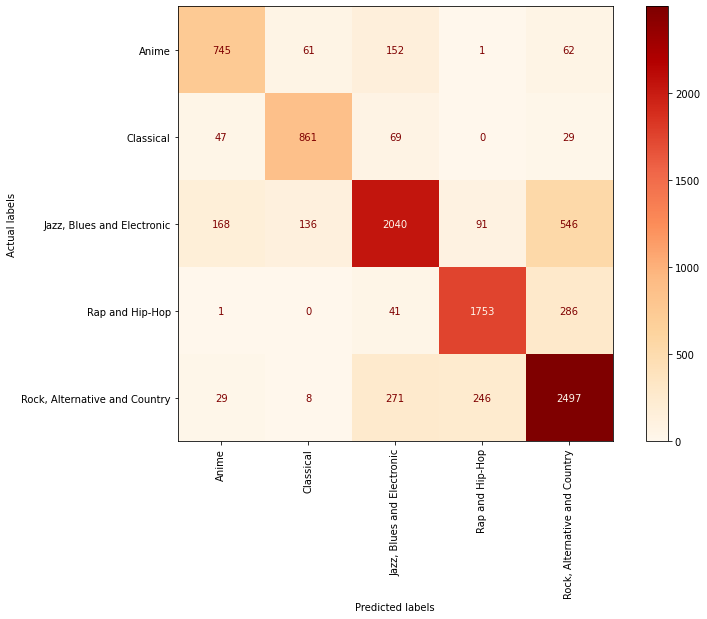

In [130]:
classification_metrics(label_true, label_pred, encoder)

#### Random Search

In [196]:
param_opt = dict(batch_size=batch_size, epochs=epochs, neurons=neurons, optimizer = optimizer)

In [200]:
model_RandomSearch = KerasClassifier(build_fn=create_model_v2, verbose=0)

<ipython-input-200-c136e5bf2816>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_RandomSearch = KerasClassifier(build_fn=create_model_v2, verbose=0)


In [201]:
random = RandomizedSearchCV(estimator=model_RandomSearch, param_distributions=param_opt, n_jobs=1, cv=3, verbose = 5, n_iter = 5)

In [202]:
random_result = random.fit(X_train, y_train_nn)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END batch_size=32, epochs=20, neurons=128, optimizer=RMSprop;, score=0.760 total time=  20.6s
[CV 2/3] END batch_size=32, epochs=20, neurons=128, optimizer=RMSprop;, score=0.769 total time=  42.4s
[CV 3/3] END batch_size=32, epochs=20, neurons=128, optimizer=RMSprop;, score=0.777 total time=  21.6s
[CV 1/3] END batch_size=64, epochs=20, neurons=64, optimizer=RMSprop;, score=0.761 total time=  10.0s
[CV 2/3] END batch_size=64, epochs=20, neurons=64, optimizer=RMSprop;, score=0.762 total time=  10.1s
[CV 3/3] END batch_size=64, epochs=20, neurons=64, optimizer=RMSprop;, score=0.776 total time=  11.3s
[CV 1/3] END batch_size=64, epochs=40, neurons=64, optimizer=Adam;, score=0.768 total time=  21.2s
[CV 2/3] END batch_size=64, epochs=40, neurons=64, optimizer=Adam;, score=0.767 total time=  20.8s
[CV 3/3] END batch_size=64, epochs=40, neurons=64, optimizer=Adam;, score=0.779 total time=  21.5s
[CV 1/3] END batch_size=64, 

In [203]:
print('according to randomsearch the best parameters are : ')
print('batch_size : ' + str(random_result.best_params_['batch_size']))
print('epochs : ' + str(random_result.best_params_['epochs']))
print('neurons : ' + str(random_result.best_params_['neurons']))
print('optimizer : ' + str(random_result.best_params_['optimizer']))

according to randomsearch the best parameters are : 
batch_size : 64
epochs : 40
neurons : 64
optimizer : Adam


In [131]:
ann_model = create_model_v2(neurons = 64, epochs = 100, optimizer = 'Adam', batch_size = 64)
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode='max', verbose=1, patience=40)
history=ann_model.fit(X_train, y_train_nn, validation_data=(X_test, y_test_nn),batch_size=64,epochs=100,callbacks=[es])

Epoch 1/100
476/476 [==============================] - 2s 4ms/step - loss: 0.9604 - accuracy: 0.6055 - val_loss: 0.7140 - val_accuracy: 0.7297
Epoch 2/100
476/476 [==============================] - 1s 3ms/step - loss: 0.7633 - accuracy: 0.6983 - val_loss: 0.6858 - val_accuracy: 0.7391
Epoch 3/100
476/476 [==============================] - 2s 3ms/step - loss: 0.7282 - accuracy: 0.7189 - val_loss: 0.6734 - val_accuracy: 0.7463
Epoch 4/100
476/476 [==============================] - 1s 3ms/step - loss: 0.7125 - accuracy: 0.7271 - val_loss: 0.6609 - val_accuracy: 0.7481
Epoch 5/100
476/476 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.7338 - val_loss: 0.6583 - val_accuracy: 0.7509
Epoch 6/100
476/476 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.7372 - val_loss: 0.6471 - val_accuracy: 0.7554
Epoch 7/100
476/476 [==============================] - 2s 3ms/step - loss: 0.6776 - accuracy: 0.7401 - val_loss: 0.6420 - val_accuracy: 0.7571

In [132]:
y_pred_nn = ann_model.predict(X_test)

317/317 [==============================] - 0s 1ms/step


In [133]:
label_true = tf.argmax(y_test_nn, axis = 1)
label_pred = tf.argmax(y_pred_nn, axis = 1)

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.79      0.69      0.74      1021
                    Classical       0.83      0.83      0.83      1006
   Jazz, Blues and Electronic       0.78      0.71      0.74      2981
              Rap and Hip-Hop       0.81      0.86      0.84      2081
Rock, Alternative and Country       0.74      0.80      0.77      3051

                     accuracy                           0.78     10140
                    macro avg       0.79      0.78      0.78     10140
                 weighted avg       0.78      0.78      0.78     10140

Confusion Matrix:



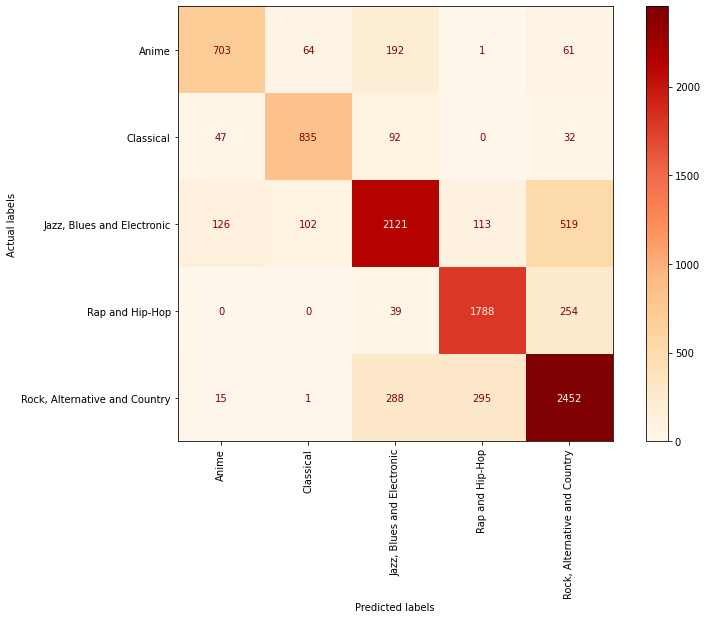

In [134]:
classification_metrics(label_true, label_pred, encoder)

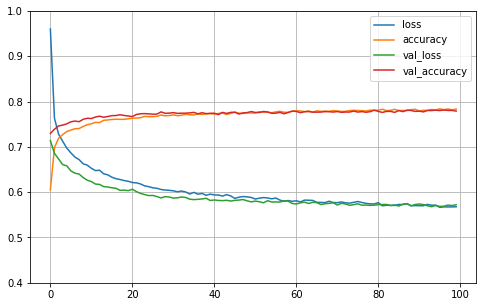

In [135]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.4, 1) # setting limits for y-axis
plt.show()